CIFAR10 (Canadian institute for advanced research) is a very famous dataset which has 10 classes.We will make a program to classify the images.This kernel is a work in process.If you like my work please do vote 
0-Aeroplane,1-Car,2-Bird,3-Cat,4-Deer,5-Dog,6-Frog,7-Hoarse,8-Boat,9-Truck

**Importing modules **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data() #使用keras提供的api读取数据

num_classes = 10
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

**Data Vizualization**

[4]


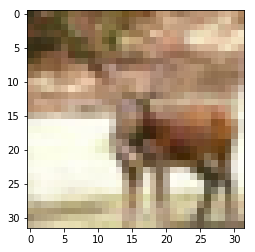

In [7]:
i=1001
plt.imshow(X_train[i])
print(y_train[i])
plt.ioff()

/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


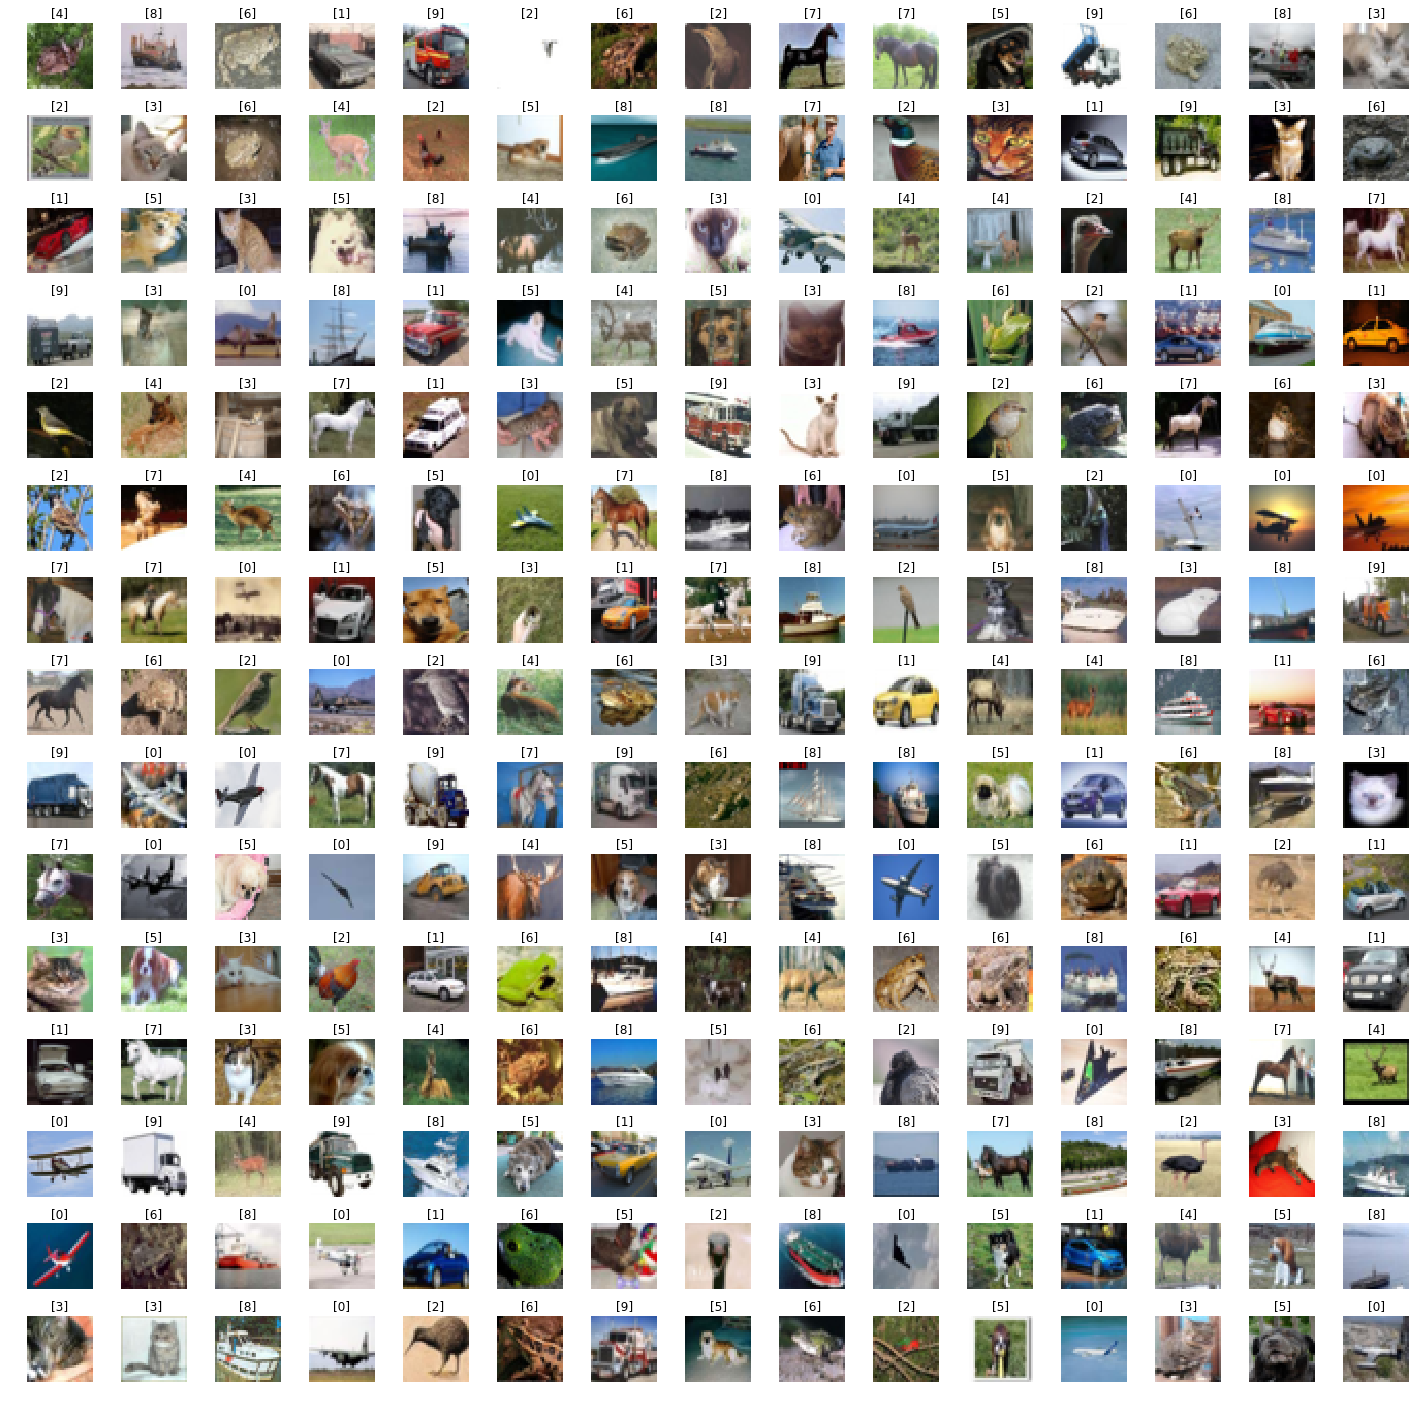

In [8]:
W_grid=15
L_grid=15
fig,axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training) #Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) #Prints labels on top of the picture
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

**Data Preparation**

In [9]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [10]:
number_cat=10

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
import keras
y_train=keras.utils.to_categorical(y_train,number_cat)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test=keras.utils.to_categorical(y_test,number_cat)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
Input_shape = X_train.shape[1:]

In [22]:
Input_shape

(32, 32, 3)

**Train the model**

In [23]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [24]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024,activation='relu'))

cnn_model.add(Dense(units=1024,activation='relu'))

cnn_model.add(Dense(units=10,activation='softmax'))

In [25]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.rmsprop(lr=0.001),metrics=['accuracy'])

In [26]:
history=cnn_model.fit(X_train,y_train,batch_size=32,epochs=2,shuffle=True)

Epoch 1/2
50000/50000 [==============================] - 14s 283us/step - loss: 1.6606 - accuracy: 0.3990
Epoch 2/2
50000/50000 [==============================] - 11s 216us/step - loss: 1.2355 - accuracy: 0.5729


**Evaluate the model**

In [27]:
evaluation=cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 97us/step
Test Accuracy: 0.6159999966621399


In [28]:
predicted_classes=cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 1, ..., 5, 1, 7])

In [29]:
y_test=y_test.argmax(1)

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

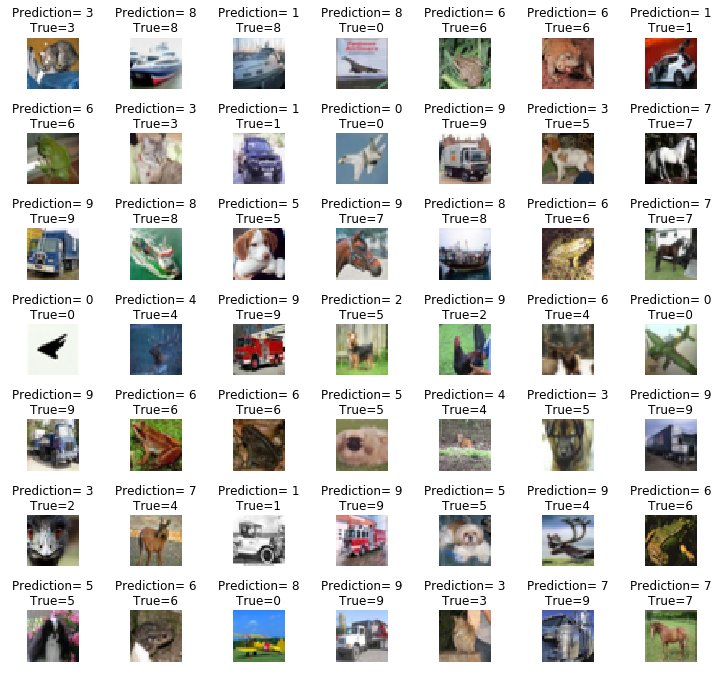

In [31]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

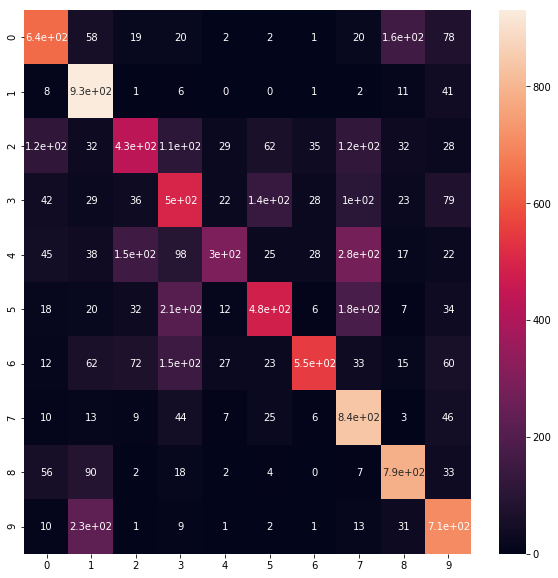

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm= confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.ioff()

**Saving the model **

In [33]:
#import os 
#directory=os.path.join(os.getcwd(),'saved_models')

#if not os.path.isdir(directory):
#    os.makedirs(directory)
#model_path=os.path.join(directory,'keras_cifar10_trained_model.h5')
#cnn_model.save(model_path)